# Introduction

## Dataset

The dataset used in this notebook is the "Ames Housing" dataset, provided in the "House Prices - Advanced Regression Techniques" kaggle competition.
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

The relevant data consists out of a detailed description of each column, a train dataset and a testing dataset.

In [1]:
# Set path to data folder (leave empty if in same folder as notebook)
data_path = 'data/house_prices/'

# Print columns and their descriptions
print_desc = False

if print_desc:
    with open(f'{data_path}data_description.txt') as f:
        print(f.read())

## Notebook goal

The goal in this notebook is to use learned techniques on a scenario to deepen/showcase acquired knowledge/skills.
The target is to predict the sales price of each housing object.

# EDA (Exploratory Data Analysis)

In [2]:
# Import basic libraries
import numpy as np
import pandas as pd

# Configure pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [3]:
# Read the data
df_train = pd.read_csv(f'{data_path}train.csv')
df_test = pd.read_csv(f'{data_path}test.csv')

print(f'Train set shape:\n{df_train.shape}')
print(f'Test set shape:\n{df_test.shape}')

Train set shape:
(1460, 81)
Test set shape:
(1459, 80)


## General Data Exploration

In [4]:
# Print the variable info of the train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Show the variable info of the test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
# Set tje index column as the dataframe index
df_train = df_train.set_index('Id')
df_test = df_test.set_index('Id')

df_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
# See general statistics about the train data
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# See general statistics about the test data
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Numerical Features

### Data Exploration and Cleaning

In [9]:
# Create new datasets consisting out of the numerical values
df_train_num = df_train.select_dtypes(exclude=['object'])
df_test_num = df_test.select_dtypes(exclude=['object'])

# Show the column information and snapshot of the dataframe for the numerical ttrain set
df_train_num.info()
df_train_num.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath     

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# Survey for quasi-constant/constant features by calculating feature variance
from sklearn.feature_selection import VarianceThreshold

# create a 10% variance threshold, dropping columns of 90% similarity in values
var_tres = VarianceThreshold(threshold = 0.10)

# Apply treshold on dataset, excluding target column salesprice
var_tres.fit(df_train_num.iloc[:, :-1])

# Create a list of the quasi-constant/constant features
quasi_constant_features = []

for column in df_train_num.iloc[:, :-1].columns:
    if column not in df_train_num.iloc[:, :-1].columns[var_tres.get_support()]:
        quasi_constant_features.append(column)

print(quasi_constant_features)

# Drop the quasi-constant/constant features from the datasets
df_train_num.drop(quasi_constant_features, axis = 1, inplace=True)
df_test_num.drop(quasi_constant_features, axis = 1, inplace=True)

df_train_num.head(3)

['BsmtHalfBath', 'KitchenAbvGr']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,2,1,3,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,2,1,3,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


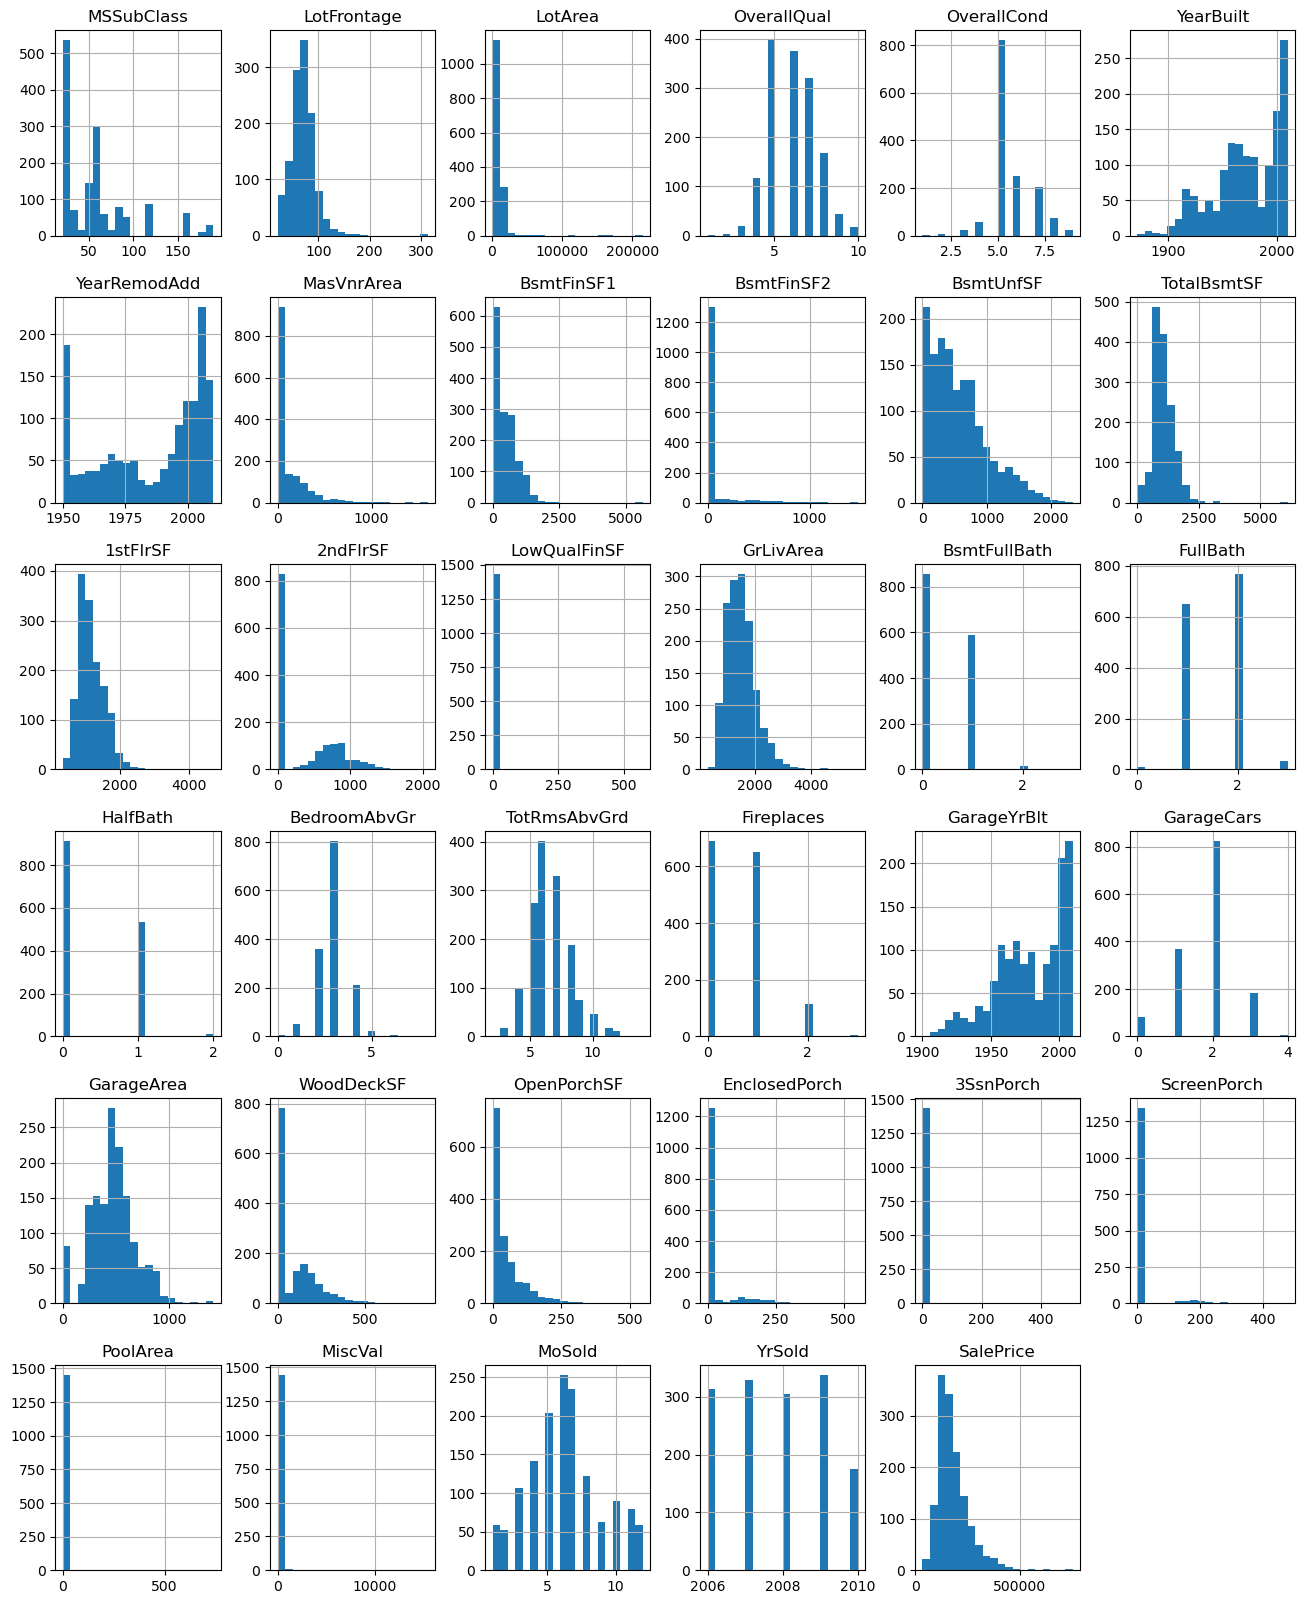

In [11]:
# Plot data distributions for the train set
fig_ = df_train_num.hist(figsize=(16, 20), bins=20)#, color="deepskyblue", edgecolor="black", xlabelsize=8, ylabelsize=8)

<Axes: >

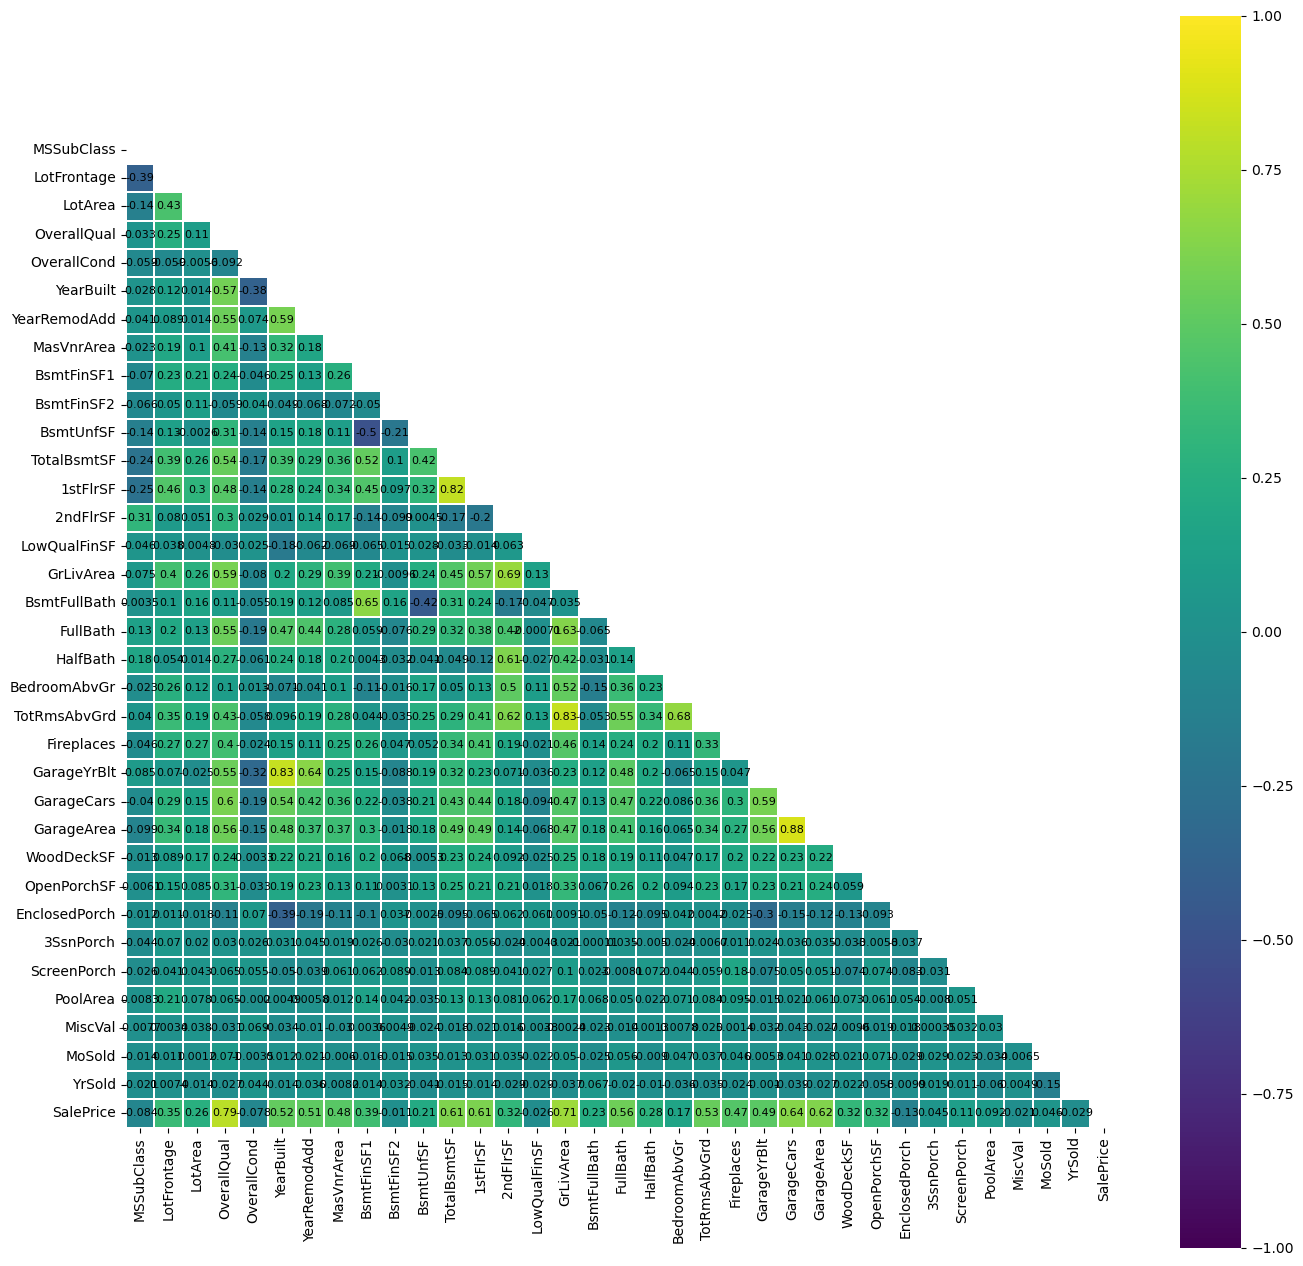

In [12]:
# Create correlation heatmap of the train dataset
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 16, 16

# Define correlation matrix
corr_matrix = df_train_num.corr()
corr_matrix

# Create mask to only display the lower part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot the heatmap
sns.heatmap(corr_matrix, mask = mask, vmax = 1.0, vmin = -1.0, linewidths = 0.1, annot_kws = \
            {'size': 8, 'color': 'black'}, square = True, cmap = 'viridis', annot = True)

In [13]:
# Select all features with correlation higher than 0.3 (30%)
# Calculate correlation with SalePrice
df_num_corr = df_train_num.corr()['SalePrice'][:-1]

features_corr_list = df_num_corr[abs(df_num_corr) >= 0.3].sort_values(ascending=False)
print(features_corr_list)

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
                 ...   
BsmtFinSF1     0.386420
LotFrontage    0.351799
WoodDeckSF     0.324413
2ndFlrSF       0.319334
OpenPorchSF    0.315856
Name: SalePrice, Length: 18, dtype: float64


In [14]:
# Create list of correlated features
features_list = features_corr_list.index.tolist()

# Add target variable to list of features
features_list.append('SalePrice')

print(features_list)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'SalePrice']


In [15]:
# Set train and test of numerical values to correlated features
df_train_num = df_train_num.loc[:, features_list]
df_test_num = df_test_num.loc[:, features_list[:-1]]

In [16]:
df_train_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,,,,,,,,,
1,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,65.0,0,854,61,208500
2,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,80.0,298,0,0,181500
3,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,68.0,0,866,42,223500
4,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,60.0,0,756,35,140000
5,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,84.0,192,1053,84,250000


In [17]:
df_test_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
Id,,,,,,,,,,,,,,,,,,
1461,5,896,1.0,730.0,882.0,896,1,5,1961,1961,1961.0,0.0,0,468.0,80.0,140,0,0
1462,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,1958.0,108.0,0,923.0,81.0,393,0,36
1463,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,1997.0,0.0,1,791.0,74.0,212,701,34
1464,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,1998.0,20.0,1,602.0,78.0,360,678,36
1465,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,1992.0,0.0,0,263.0,43.0,0,0,82


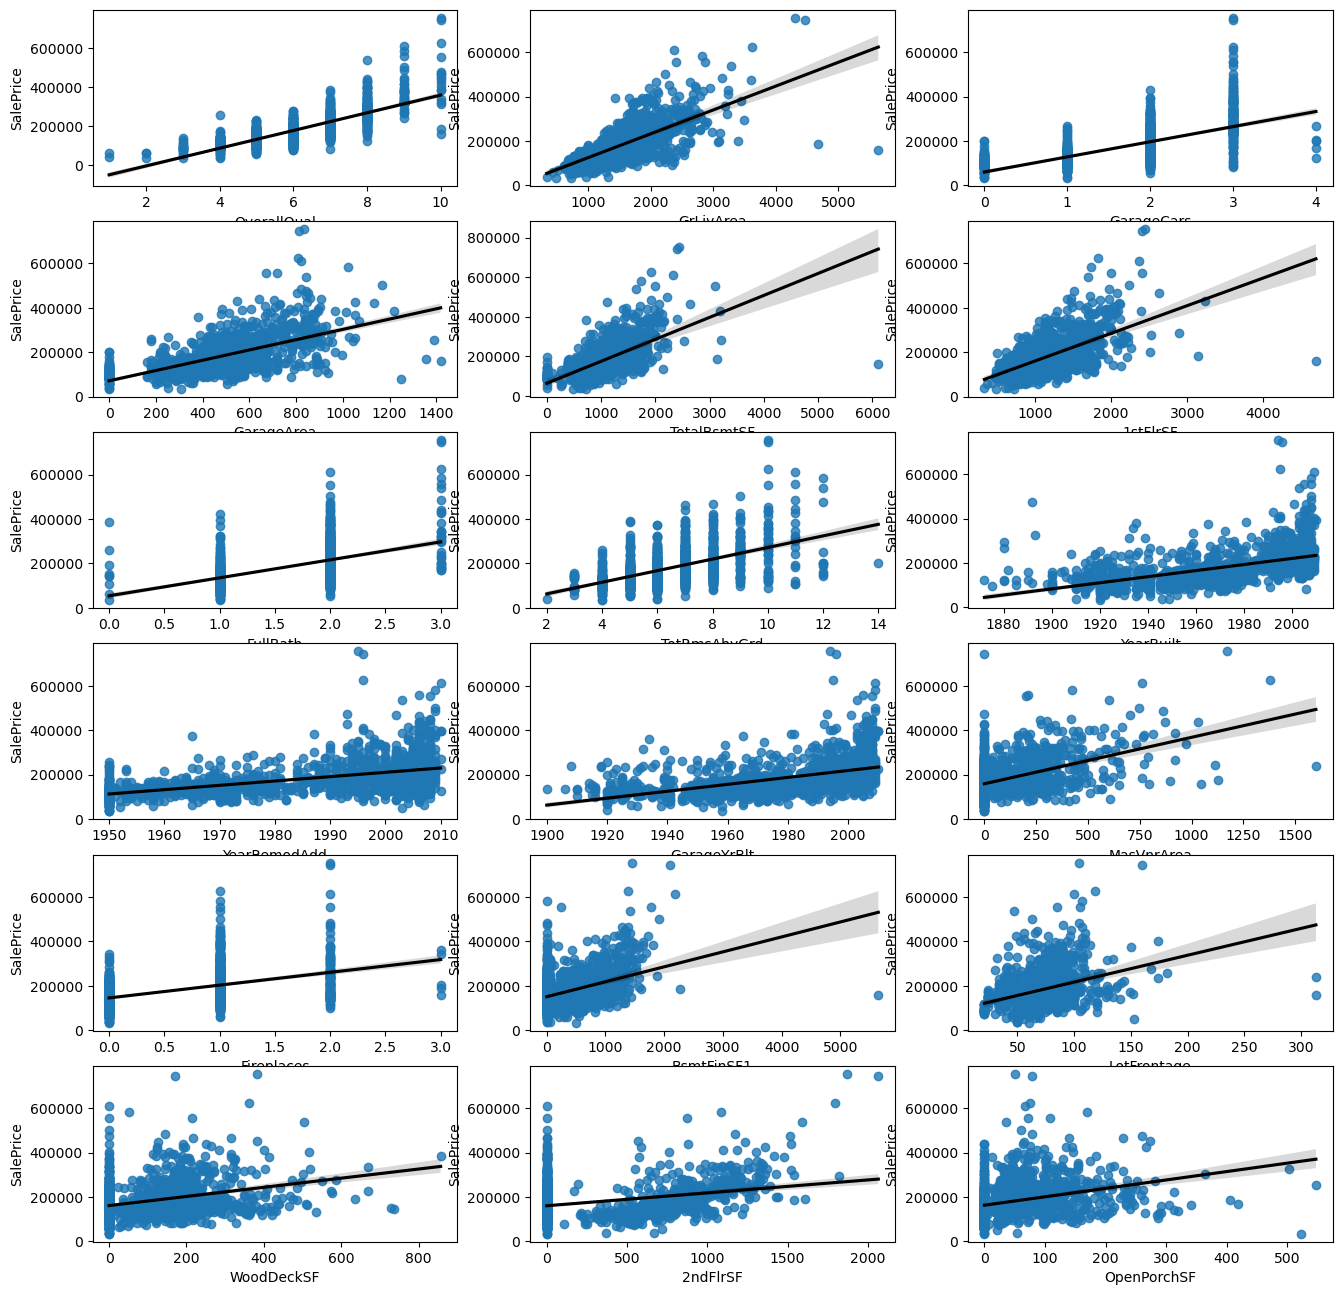

In [18]:
# Plot each feature with SalePrice to check features for later usage
# Define plot layout (3 figures per row)
fig, ax = plt.subplots(round(len(features_list) / 3), 3)

for i, ax in enumerate(fig.axes):
    # Plot each feature with SalePrice
    if i < (len(features_list) - 1):
        sns.regplot(x = features_list[i], y = 'SalePrice', data = df_train_num, ax = ax, \
                    line_kws = {'color': 'black'})

### Missing Data Handling

In [19]:
# Search for columns with missing values
column_NA = df_train_num.columns[df_train_num.isnull().any()]
print(column_NA)

Index(['GarageYrBlt', 'MasVnrArea', 'LotFrontage'], dtype='object')


In [20]:
# Print missing value percentage for each column
for i in column_NA:
    print(f'{i}: {round(df_train_num[i].isnull().sum() * (100 / len(df_train_num)), 4)}')

GarageYrBlt: 5.5479
MasVnrArea: 0.5479
LotFrontage: 17.7397


In [21]:
# Print first 100 rows of each column to view serveral of the missing values in the data
pd.set_option('display.max_rows', 100)

print(df_train_num[column_NA][:100])

     GarageYrBlt  MasVnrArea  LotFrontage
Id                                       
1         2003.0       196.0         65.0
2         1976.0         0.0         80.0
3         2001.0       162.0         68.0
4         1998.0         0.0         60.0
5         2000.0       350.0         84.0
6         1993.0         0.0         85.0
7         2004.0       186.0         75.0
8         1973.0       240.0          NaN
9         1931.0         0.0         51.0
10        1939.0         0.0         50.0
11        1965.0         0.0         70.0
12        2005.0       286.0         85.0
13        1962.0         0.0          NaN
14        2006.0       306.0         91.0
15        1960.0       212.0          NaN
16        1991.0         0.0         51.0
17        1970.0       180.0          NaN
18        1967.0         0.0         72.0
19        2004.0         0.0         66.0
20        1958.0         0.0         70.0
21        2005.0       380.0        101.0
22        1930.0         0.0      

In [22]:
# check if values of GarageYrBlt are NaN where GarageArea == 0
list(np.where(df_train_num['GarageArea'] == 0))[0]
list(np.where(df_train_num['GarageYrBlt'] != df_train_num['GarageYrBlt']))[0]
equivalent = (list(np.where(df_train_num['GarageArea'] == 0))[0] == \
              list(np.where(df_train_num['GarageYrBlt'] != df_train_num['GarageYrBlt']))[0])
print(equivalent.all())

True


Conclusion: All missing values represent houses without garages

In [23]:
# replace missing values of GarageYrBlt with 0 for no garage built for train and test
df_train_num.loc[df_train_num['GarageArea'] == 0, 'GarageYrBlt'] = 0
df_test_num.loc[df_test_num['GarageArea'] == 0, 'GarageYrBlt'] = 0

# check if there are any missing values left
print(df_train_num['GarageYrBlt'].isnull().any())
print(df_test_num['GarageYrBlt'].isnull().any())

False
True


In [24]:
# There still seem to be missing values remaining in the test set
df_test_num.loc[df_test_num['GarageYrBlt'].isnull()]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
Id,,,,,,,,,,,,,,,,,,
2127,6,1984,1.0,360.0,1242.0,1242,2,8,1910,1983,NaN,0.0,0,196.0,57.0,64,742,0
2577,5,1828,NaN,NaN,859.0,942,2,6,1923,1999,NaN,0.0,0,548.0,50.0,174,886,0


In [25]:
# The missing value with Id 2127 seems to be a true missing value, as GarageArea and GarageCars are known, but
# GarageYrBlt is NaN, as it is the case for a single value in the dataset, it is not worth it to impute the value
# and the row should simply be removed.
df_test_num = df_test_num.drop(2127)
df_test = df_test.drop(2127)
df_test_num.loc[df_test_num['GarageYrBlt'].isnull()]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
Id,,,,,,,,,,,,,,,,,,
2577,5,1828,NaN,NaN,859.0,942,2,6,1923,1999,NaN,0.0,0,548.0,50.0,174,886,0


In [26]:
# As all the values of Id 2577 are missing (GarageCars, GarageArea, GarageYrBlt), these values should according to
# the data description show that there is no garage, meaning that they should be changed to 0
df_test_num.loc[df_test_num['GarageCars'].isnull(), 'GarageCars'] = 0
df_test_num.loc[df_test_num['GarageArea'].isnull(), 'GarageArea'] = 0
df_test_num.loc[df_test_num['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0

# check if there are any missing values left
print(df_train_num['GarageYrBlt'].isnull().any())
print(df_test_num['GarageYrBlt'].isnull().any())

False
False


In [27]:
# check if the total value of NaN/0 is the same in VnrArea and VnrType
MasVnrArea_is_0 = list(np.where(df_train['MasVnrArea'] == 0))[0]
MasVnrArea_is_NaN = list(np.where(df_train_num['MasVnrArea'] != df_train_num['MasVnrArea']))[0]

MasVnrType_is_NaN = list(np.where(df_train['MasVnrType'] != df_train['MasVnrType']))[0]

print('MasVnrArea is 0: ' + str(MasVnrArea_is_0.size))
print('MasVnrArea is NaN: ' + str(MasVnrArea_is_NaN.size))
print('MasVnrArea is 0/NaN: ' + str(MasVnrArea_is_NaN.size + MasVnrArea_is_0.size))
print('\nMasVnrType is NaN: ' + str(MasVnrType_is_NaN.size))

MasVnrArea is 0: 861
MasVnrArea is NaN: 8
MasVnrArea is 0/NaN: 869

MasVnrType is NaN: 872


In [28]:
# check if all 0 values in MasVnrArea are NaN in MasVnrType
print((df_train[['MasVnrArea', 'MasVnrType']].loc[df_train_num['MasVnrArea'] == 0 & \
                                                  (df_train['MasVnrType'] != df_train['MasVnrType'])]).size / 2)

# check if all NaN values in MasVnrArea are NaN in MasVnrType
print((df_train[['MasVnrArea', 'MasVnrType']].loc[(df_train_num['MasVnrArea'] != df_train_num['MasVnrArea']) & \
                                                  (df_train['MasVnrType'] != df_train['MasVnrType'])]).size / 2)

861.0
8.0


In [29]:
# as all 0/NaN of MasVnrArea are NaN in MasVnrType, the NaN in MasVnrArea should be 0 values
# replacing the NaN in MasVnrArea with 0
df_train_num.loc[df_train['MasVnrType'].isnull(), 'MasVnrArea'] = 0
df_test_num.loc[df_test['MasVnrType'].isnull(), 'MasVnrArea'] = 0

# check if there are any missing values left
print(df_train_num['MasVnrArea'].isnull().any())
print(df_test_num['MasVnrArea'].isnull().any())

False
False


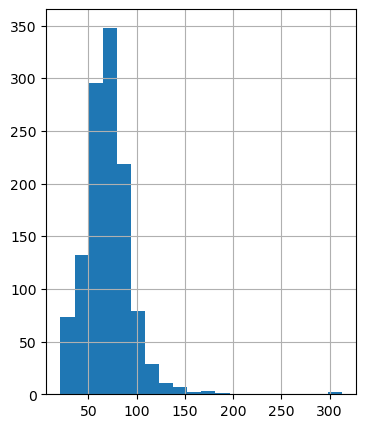

In [30]:
# plot the data of LotFrontage due to high (above 15%) amount of missing values
fig_ = df_train_num['LotFrontage'].hist(figsize=(4, 5), bins=20)

In [31]:
# check for 0 values in LotFrontage
df_train_num.loc[df_train['LotFrontage'] == 0].size

0

In [32]:
# The desciption of the variable LotFrontage states: "Linear feet of street connected to property"
# As a house can be built directly at a street, the NaN values of this variable should describe 0 values
# replacing LotFrontage NaN with 0
df_train_num.loc[df_train['LotFrontage'].isnull(), 'LotFrontage'] = 0
df_test_num.loc[df_test['LotFrontage'].isnull(), 'LotFrontage'] = 0

# check if there are any missing values left
print(df_train_num['LotFrontage'].isnull().any())
print(df_test_num['LotFrontage'].isnull().any())

False
False


In [33]:
# After testing the train data for missing values, the same must be done for the test data
# Search for columns with missing values
column_NA = df_test_num.columns[df_test_num.isnull().any()]
print(column_NA)

Index(['TotalBsmtSF', 'BsmtFinSF1'], dtype='object')


In [34]:
# Print missing value percentage for each column
for i in column_NA:
    print(f'{i}: {round(df_test_num[i].isnull().sum() * (100 / len(df_test_num)), 4)}')

TotalBsmtSF: 0.0686
BsmtFinSF1: 0.0686


In [35]:
# Printing the rows where the missing value of TotalBsmtSF are:
df_test_num.loc[df_test_num['TotalBsmtSF'].isnull()]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
Id,,,,,,,,,,,,,,,,,,
2121,4,896,1.0,280.0,NaN,896,1,4,1946,1950,1946.0,0.0,0,NaN,99.0,0,0,0


In [36]:
# The missing values of both columns are in one row, which makes looking for the reason easier
# cross checking with categoric varaible whether basement exists (according to feature description)
df_test.loc[[2121]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [37]:
# As all Bsmt[variables] are NaN, it can be considered that no basement exists, therefore the value of the missing
# values should be replaced with 0
df_test_num.loc[df_test['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = 0
df_test_num.loc[df_test['BsmtFinSF1'].isnull(), 'BsmtFinSF1'] = 0

# Search for columns with missing values
column_NA = df_test_num.columns[df_test_num.isnull().any()]
print(column_NA)

Index([], dtype='object')


This concludes the missing data handling of numerical features leading to the following final result:

In [38]:
# numerical data final check
# check for any missing values in all columns
print(df_train_num.isnull().any())
print(df_test_num.isnull().any())

# print a snapshot of the first 20 elements in the numeric train data
df_train_num[:20]

OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt     False
MasVnrArea      False
Fireplaces      False
BsmtFinSF1      False
LotFrontage     False
WoodDeckSF      False
2ndFlrSF        False
OpenPorchSF     False
SalePrice       False
dtype: bool
OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt     False
MasVnrArea      False
Fireplaces      False
BsmtFinSF1      False
LotFrontage     False
WoodDeckSF      False
2ndFlrSF        False
OpenPorchSF     False
dtype: bool


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,,,,,,,,,
1,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,65.0,0,854,61,208500
2,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,80.0,298,0,0,181500
3,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,68.0,0,866,42,223500
4,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,60.0,0,756,35,140000
5,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,84.0,192,1053,84,250000
6,5,1362,2,480,796,796,1,5,1993,1995,1993.0,0.0,0,732,85.0,40,566,30,143000
7,8,1694,2,636,1686,1694,2,7,2004,2005,2004.0,186.0,1,1369,75.0,255,0,57,307000
8,7,2090,2,484,1107,1107,2,7,1973,1973,1973.0,240.0,2,859,0.0,235,983,204,200000
9,7,1774,2,468,952,1022,2,8,1931,1950,1931.0,0.0,2,0,51.0,90,752,0,129900


## Categorical Features

### Data Exploration

In [39]:
# Create new datasets consisting out of the categorical values
df_train_cat = df_train.select_dtypes(exclude=['int64', 'float64'])
df_test_cat = df_test.select_dtypes(exclude=['int64', 'float64'])

# Show the column information and snapshot of the dataframe for the categorical train set
df_train_cat.info()
df_train_cat.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null   ob

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
# Attach SalePrice variable to train set
df_train_cat['SalePrice'] = df_train['SalePrice']
df_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


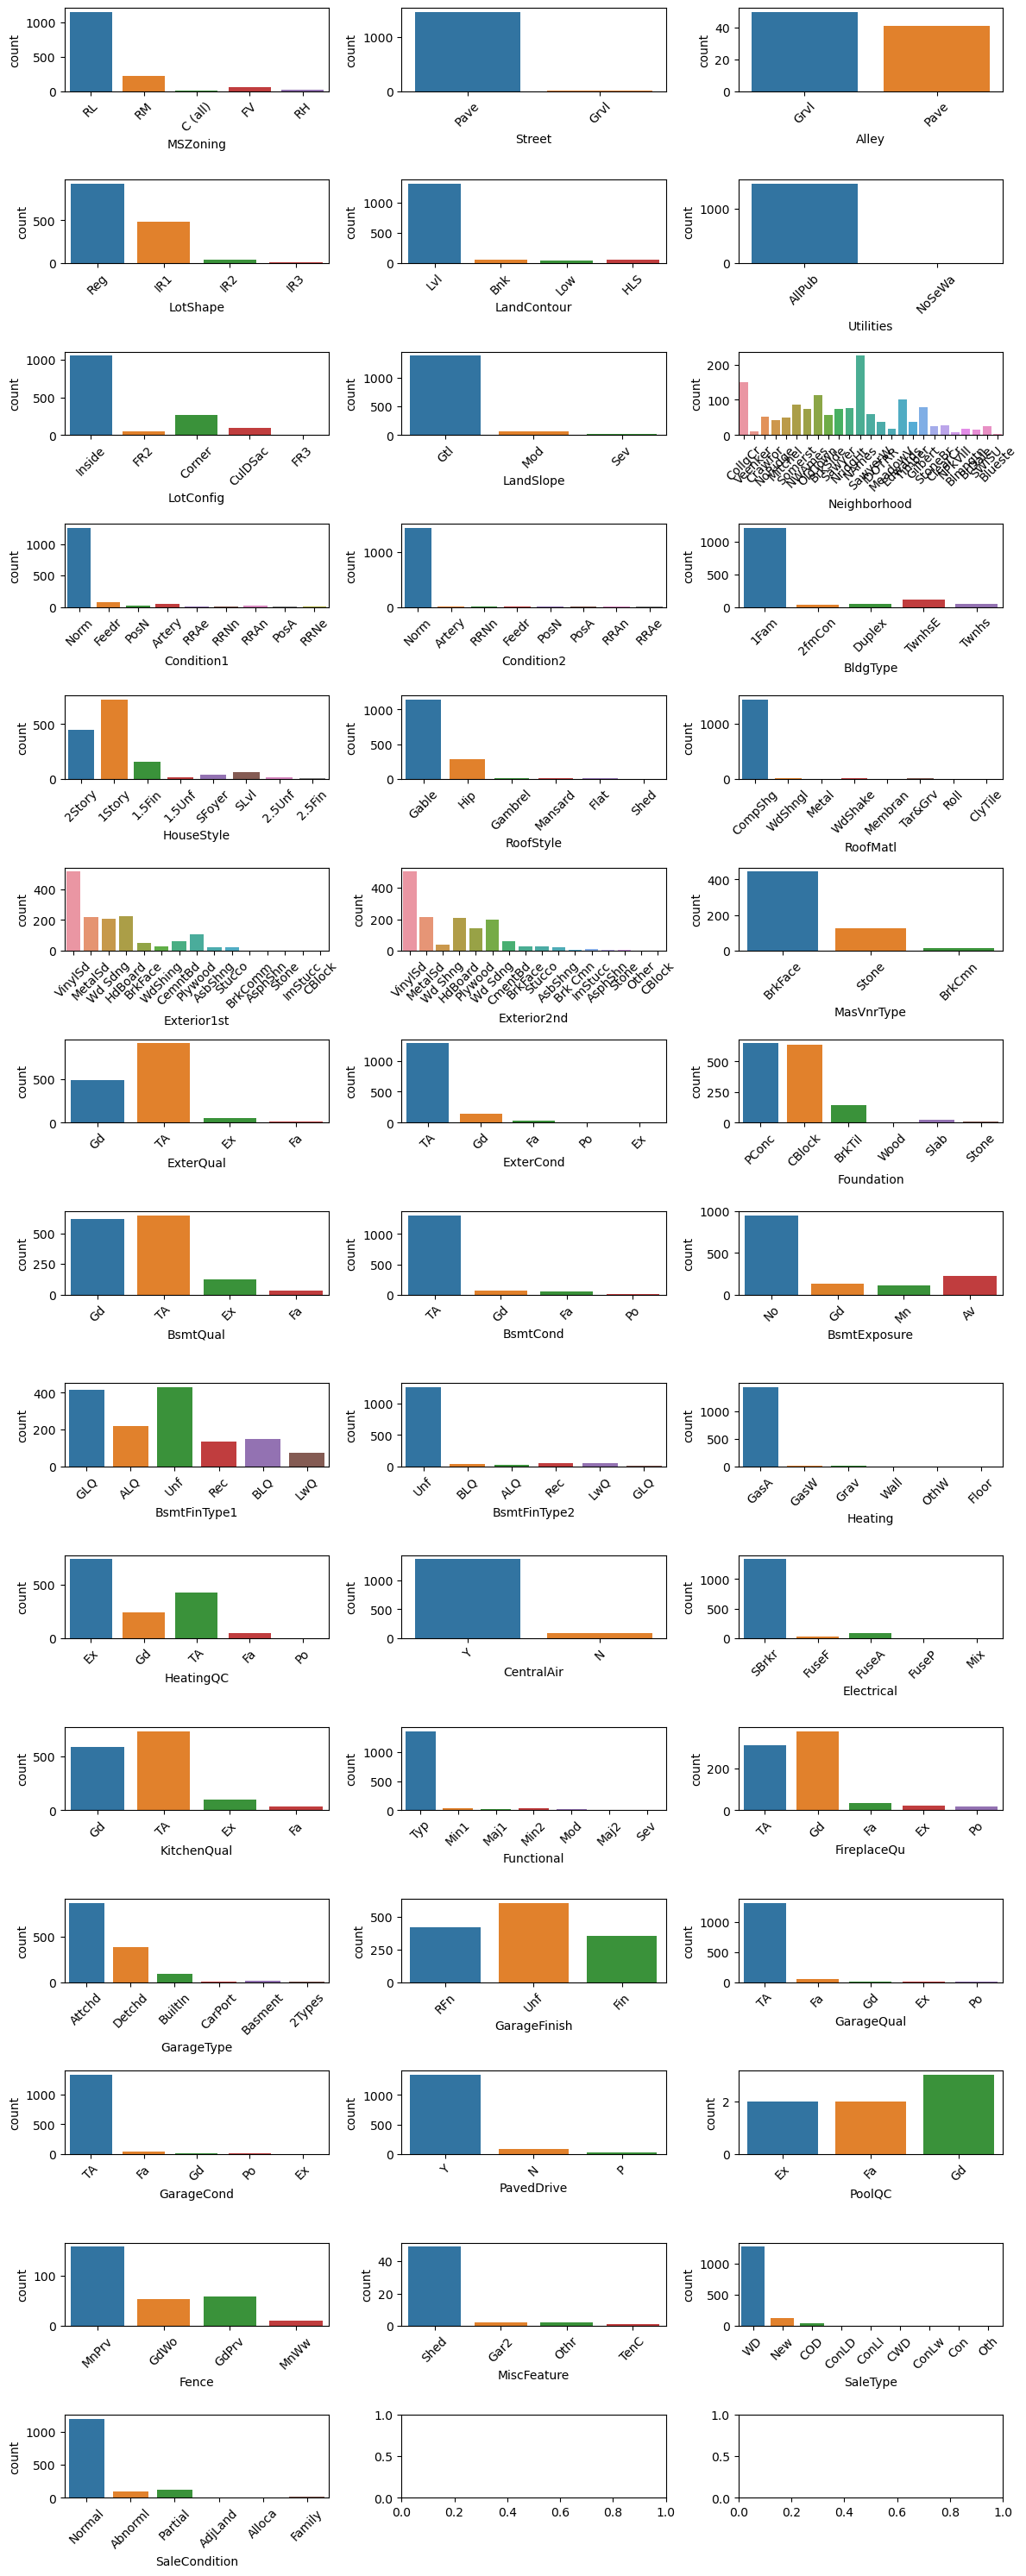

In [41]:
# Plot a countplot for each categorical variable in the train set
# Define plot layout (3 figures per row)
fig, axes = plt.subplots(
    round(len(df_train_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    # plot the count of categorical values for each feature
    if i < len(df_train_cat.columns) - 1:
        ax.tick_params(axis='x', labelrotation = 45)
        sns.countplot(
            x=df_train_cat.columns[i], data=df_train_cat, ax=ax)

fig.tight_layout()

### Missing Data Handling

In [42]:
# Search for columns with missing values
column_NA = df_train_cat.columns[df_train_cat.isnull().any()]
print(column_NA)

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')


In [43]:
# Print missing value percentage for each column
for i in column_NA:
    print(f'{i}: {round(df_train_cat[i].isnull().sum() * (100 / len(df_train_cat)), 4)}')

Alley: 93.7671
MasVnrType: 59.726
BsmtQual: 2.5342
BsmtCond: 2.5342
BsmtExposure: 2.6027
BsmtFinType1: 2.5342
BsmtFinType2: 2.6027
Electrical: 0.0685
FireplaceQu: 47.2603
GarageType: 5.5479
GarageFinish: 5.5479
GarageQual: 5.5479
GarageCond: 5.5479
PoolQC: 99.5205
Fence: 80.7534
MiscFeature: 96.3014


In [44]:
# As quasi-constant feature removing with 10% threshold will be used as with numerical features, all features with
# more than 90% missing values should be removed.
for i in column_NA:
    if (round(df_train_cat[i].isnull().sum() * (100 / len(df_train_cat)), 4) >= 90.0):
        df_train_cat = df_train_cat.drop(i, axis = 1)
        df_test_cat = df_test_cat.drop(i, axis = 1)

column_NA = df_train_cat.columns[df_train_cat.isnull().any()]
for i in column_NA:
    print(f'{i}: {round(df_train_cat[i].isnull().sum() * (100 / len(df_train_cat)), 4)}')

MasVnrType: 59.726
BsmtQual: 2.5342
BsmtCond: 2.5342
BsmtExposure: 2.6027
BsmtFinType1: 2.5342
BsmtFinType2: 2.6027
Electrical: 0.0685
FireplaceQu: 47.2603
GarageType: 5.5479
GarageFinish: 5.5479
GarageQual: 5.5479
GarageCond: 5.5479
Fence: 80.7534


In [45]:
# According to the data description, the following variables are NaN when they are not existent in the house:
# MasVnrType, Bsmt[variables], FireplaceQu, Garage[variables], Fence
# Therefore NaN values of these variables can be replaced by new category

# replace missing values of MasVnrType with NoVnr for train and test
df_train_cat.loc[df_train_cat['MasVnrType'].isnull(), 'MasVnrType'] = 'NoVnr'
df_test_cat.loc[df_test_cat['MasVnrType'].isnull(), 'MasVnrType'] = 'NoVnr'

# replace missing values of BsmtQual with NoBsmt for train and test
df_train_cat.loc[df_train_cat['BsmtQual'].isnull(), 'BsmtQual'] = 'NoBsmt'
df_test_cat.loc[df_test_cat['BsmtQual'].isnull(), 'BsmtQual'] = 'NoBsmt'

# replace missing values of BsmtCond with NoBsmt for train and test
df_train_cat.loc[df_train_cat['BsmtCond'].isnull(), 'BsmtCond'] = 'NoBsmt'
df_test_cat.loc[df_test_cat['BsmtCond'].isnull(), 'BsmtCond'] = 'NoBsmt'

# replace missing values of BsmtExposure with NoBsmt for train and test
df_train_cat.loc[df_train_cat['BsmtExposure'].isnull(), 'BsmtExposure'] = 'NoBsmt'
df_test_cat.loc[df_test_cat['BsmtExposure'].isnull(), 'BsmtExposure'] = 'NoBsmt'

# replace missing values of BsmtFinType1 with NoBsmt for train and test
df_train_cat.loc[df_train_cat['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'NoBsmt'
df_test_cat.loc[df_test_cat['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'NoBsmt'

# replace missing values of BsmtFinType2 with NoBsmt where BsmtFinType1 is NaN and No2Fin where BsmtFinType2 is NaN
# for train and test. This needs to be done as Basements can consist of only one finish, resulting NaN where there
# is a basement, but no second basement finish.
df_train_cat.loc[df_train_cat['BsmtFinType1'].isnull(), 'BsmtFinType2'] = 'NoBsmt'
df_test_cat.loc[df_test_cat['BsmtFinType1'].isnull(), 'BsmtFinType2'] = 'NoBsmt'

df_train_cat.loc[df_train_cat['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'No2Fin'
df_test_cat.loc[df_test_cat['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'No2Fin'

# replace missing values of FireplaceQu with NoFp for train and test
df_train_cat.loc[df_train_cat['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NoFp'
df_test_cat.loc[df_test_cat['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NoFp'

# replace missing values of GarageType with NoGarage for train and test
df_train_cat.loc[df_train_cat['GarageType'].isnull(), 'GarageType'] = 'NoGarage'
df_test_cat.loc[df_test_cat['GarageType'].isnull(), 'GarageType'] = 'NoGarage'

# replace missing values of GarageFinish with NoGarage for train and test
df_train_cat.loc[df_train_cat['GarageFinish'].isnull(), 'GarageFinish'] = 'NoGarage'
df_test_cat.loc[df_test_cat['GarageFinish'].isnull(), 'GarageFinish'] = 'NoGarage'

# replace missing values of GarageQual with NoGarage for train and test
df_train_cat.loc[df_train_cat['GarageQual'].isnull(), 'GarageQual'] = 'NoGarage'
df_test_cat.loc[df_test_cat['GarageQual'].isnull(), 'GarageQual'] = 'NoGarage'

# replace missing values of GarageCond with NoGarage for train and test
df_train_cat.loc[df_train_cat['GarageCond'].isnull(), 'GarageCond'] = 'NoGarage'
df_test_cat.loc[df_test_cat['GarageCond'].isnull(), 'GarageCond'] = 'NoGarage'

# replace missing values of Fence with NoFence for train and test
df_train_cat.loc[df_train_cat['Fence'].isnull(), 'Fence'] = 'NoFence'
df_test_cat.loc[df_test_cat['Fence'].isnull(), 'Fence'] = 'NoFence'

In [46]:
# Print missing value percentage for each column
column_NA = df_train_cat.columns[df_train_cat.isnull().any()]
for i in column_NA:
    print(f'{i}: {round(df_train_cat[i].isnull().sum() * (100 / len(df_train_cat)), 4)}')

Electrical: 0.0685


<Axes: xlabel='Electrical', ylabel='count'>

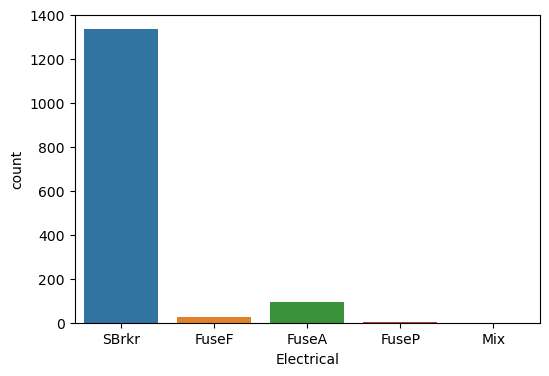

In [47]:
# As the variable Electrical has missing values that are non zero, the missing values must be imputed.
# Therefore the variable needs to be plotted to look into the details
rcParams['figure.figsize'] = 6, 4
sns.countplot(x = df_train_cat['Electrical'])

In [48]:
# As majority of results are in SBrkr, the 0.0685% of missing values can be changed to it without significantly 
# influencing the data
df_train_cat.loc[df_train_cat['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
df_test_cat.loc[df_test_cat['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [49]:
# check for missing values in both train and test
print(df_train_cat.isnull().any())
print(df_test_cat.isnull().any())

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
Fence            False
SaleType         False
SaleCondition    False
SalePrice        False
dtype: bool
MSZoning          True
Street           False

In [50]:
# As there are still missing values in the test dataset after cleaning the train data, the missing values of the 
# test data will be further explored from here.

# print missing value percentages of test data
column_NA = df_test_cat.columns[df_test_cat.isnull().any()]
for i in column_NA:
    print(f'{i}: {round(df_test_cat[i].isnull().sum() * (100 / len(df_test_cat)), 4)}')

MSZoning: 0.2743
Utilities: 0.1372
Exterior1st: 0.0686
Exterior2nd: 0.0686
KitchenQual: 0.0686
Functional: 0.1372
SaleType: 0.0686


In [51]:
# Look into missing value rows of MSZoning
df_test_cat[df_test_cat['MSZoning'].isnull()]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,NaN,Grvl,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,NoVnr,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,No2Fin,GasA,TA,N,FuseA,TA,Min1,NoFp,Detchd,Unf,TA,TA,N,NoFence,ConLD,Normal
2217,NaN,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,AsbShng,VinylSd,NoVnr,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,No2Fin,Wall,Po,N,FuseA,Fa,NaN,NoFp,Attchd,Unf,Fa,Po,N,NoFence,WD,Abnorml
2251,NaN,Pave,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,Hip,CompShg,Wd Sdng,Wd Sdng,NoVnr,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Maj1,NoFp,Detchd,Unf,TA,Fa,N,NoFence,WD,Normal
2905,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,Gable,CompShg,CBlock,VinylSd,NoVnr,TA,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,No2Fin,GasA,TA,Y,FuseA,TA,Mod,NoFp,Attchd,Unf,Fa,TA,N,NoFence,WD,Normal


<Axes: xlabel='MSZoning', ylabel='count'>

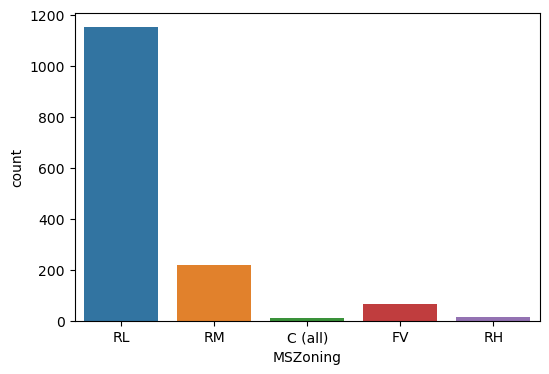

In [52]:
# As the data is mostly complete except for MSZoning, the data can be imputed according to the distribution of
# MSZoning
rcParams['figure.figsize'] = 6, 4
sns.countplot(x = df_train_cat['MSZoning'])

In [53]:
# As majority of values are of value RL, missing values can be imputed as RL
df_train_cat.loc[df_train_cat['MSZoning'].isnull(), 'MSZoning'] = 'RL'
df_test_cat.loc[df_test_cat['MSZoning'].isnull(), 'MSZoning'] = 'RL'

# Print missing value percentage of MSZoning for check
print(f'MSZoning: {round(df_test_cat["MSZoning"].isnull().sum() * (100 / len(df_test_cat)), 4)}')

MSZoning: 0.0


In [54]:
# Look into missing value rows of Utilities
df_test_cat[df_test_cat['Utilities'].isnull()]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,RL,Grvl,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,NoVnr,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,No2Fin,GasA,TA,N,FuseA,TA,Min1,NoFp,Detchd,Unf,TA,TA,N,NoFence,ConLD,Normal
1946,RL,Pave,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,NoVnr,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,FuseA,TA,Min2,Gd,Attchd,Unf,TA,TA,Y,NoFence,WD,Normal


<Axes: xlabel='Utilities', ylabel='count'>

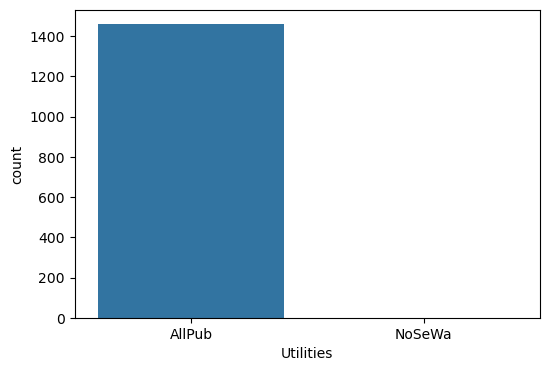

In [55]:
# Look into distribution of Utilits feature
rcParams['figure.figsize'] = 6, 4
sns.countplot(x = df_train_cat['Utilities'])

In [56]:
# Missing values can be replaced with AllPub
df_train_cat.loc[df_train_cat['Utilities'].isnull(), 'Utilities'] = 'AllPub'
df_test_cat.loc[df_test_cat['Utilities'].isnull(), 'Utilities'] = 'AllPub'

# Print missing value percentage of Utilities for check
print(f'Utilities: {round(df_test_cat["Utilities"].isnull().sum() * (100 / len(df_test_cat)), 4)}')

Utilities: 0.0


In [57]:
# Look into missing value rows of Exterior1st
df_test_cat[df_test_cat['Exterior1st'].isnull()]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,NaN,NaN,NoVnr,TA,TA,PConc,TA,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,Fa,Typ,Gd,NoGarage,NoGarage,NoGarage,NoGarage,Y,NoFence,WD,Normal


<Axes: xlabel='Exterior1st', ylabel='count'>

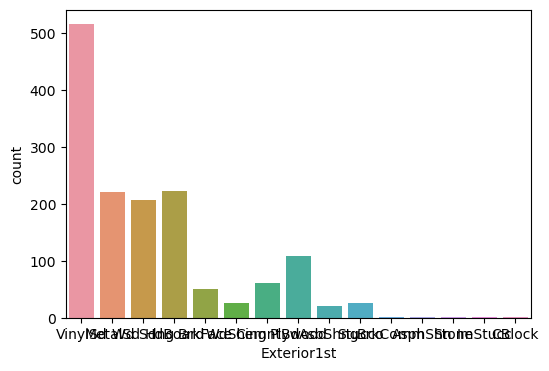

In [58]:
# Row is missing both Exterior1st and Exterior2nd feature
# Look into distribution of Exterior1st feature
rcParams['figure.figsize'] = 6, 4
sns.countplot(x = df_train_cat['Exterior1st'])

In [59]:
# As there are too many possibilities for the value and using more complicated imputation methods is not worth it
# for one row of data, the row will be removed
df_test_cat = df_test_cat.drop(2152)
df_test_num = df_test_num.drop(2152)
df_test = df_test.drop(2152)

# Print missing value percentage of MSZoning for check
print(f'Exterior1st: {round(df_test_cat["Exterior1st"].isnull().sum() * (100 / len(df_test_cat)), 4)}')
print(f'Exterior2nd: {round(df_test_cat["Exterior2nd"].isnull().sum() * (100 / len(df_test_cat)), 4)}')

Exterior1st: 0.0
Exterior2nd: 0.0


In [60]:
# Check which features still have missing values as an overview
column_NA = df_test_cat.columns[df_test_cat.isnull().any()]
for i in column_NA:
    print(f'{i}: {round(df_test_cat[i].isnull().sum() * (100 / len(df_test_cat)), 4)}')

KitchenQual: 0.0686
Functional: 0.1373
SaleType: 0.0686


In [61]:
# Look into missing value rows of KitchenQual
df_test_cat[df_test_cat['KitchenQual'].isnull()]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1556,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,NoVnr,TA,TA,BrkTil,Gd,Fa,No,Unf,Unf,GasA,Gd,N,SBrkr,NaN,Mod,NoFp,Detchd,Unf,Fa,Fa,N,NoFence,COD,Normal


<Axes: xlabel='KitchenQual', ylabel='count'>

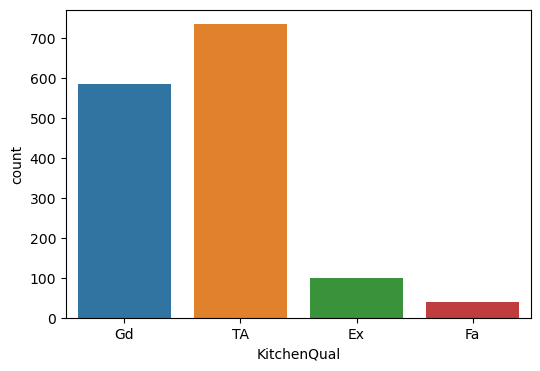

In [62]:
# Look into distribution of KitchenQual feature
rcParams['figure.figsize'] = 6, 4
sns.countplot(x = df_train_cat['KitchenQual'])

In [63]:
# As making an assumption of the missing value in KitchenQual is not possible due to the distribution, the row
# will be removed
df_test_cat = df_test_cat.drop(1556)
df_test_num = df_test_num.drop(1556)
df_test = df_test.drop(1556)

# Print missing value percentage of MSZoning for check
print(f'KitchenQual: {round(df_test_cat["KitchenQual"].isnull().sum() * (100 / len(df_test_cat)), 4)}')

KitchenQual: 0.0


In [64]:
# Look into missing value rows of Functional
df_test_cat[df_test_cat['Functional'].isnull()]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2217,RL,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,AsbShng,VinylSd,NoVnr,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,No2Fin,Wall,Po,N,FuseA,Fa,NaN,NoFp,Attchd,Unf,Fa,Po,N,NoFence,WD,Abnorml
2474,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,NoVnr,Fa,Fa,CBlock,TA,Fa,No,Unf,Unf,GasA,Fa,Y,SBrkr,TA,NaN,NoFp,Detchd,Unf,TA,Fa,N,NoFence,COD,Abnorml


<Axes: xlabel='Functional', ylabel='count'>

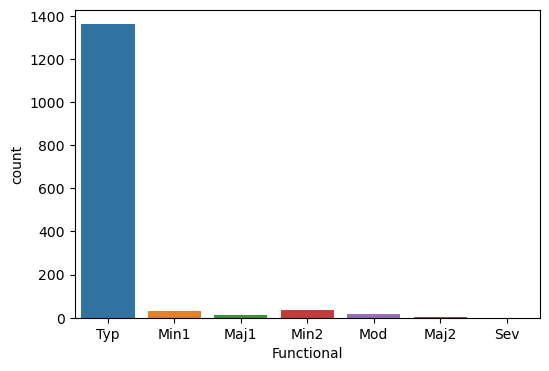

In [65]:
# Look into distribution of Functional feature
rcParams['figure.figsize'] = 6, 4
sns.countplot(x = df_train_cat['Functional'])

In [66]:
# As distribution of Functional mainly consists of type Typ, the missing value has a high probability to be of this
# type as well
df_train_cat.loc[df_train_cat['Functional'].isnull(), 'Functional'] = 'Typ'
df_test_cat.loc[df_test_cat['Functional'].isnull(), 'Functional'] = 'Typ'

# Print missing value percentage of Utilities for check
print(f'Functional: {round(df_test_cat["Functional"].isnull().sum() * (100 / len(df_test_cat)), 4)}')

Functional: 0.0


In [67]:
# Look into missing value rows of Functional
df_test_cat[df_test_cat['SaleType'].isnull()]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2490,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,BLQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,NoFence,NaN,Normal


<Axes: xlabel='SaleType', ylabel='count'>

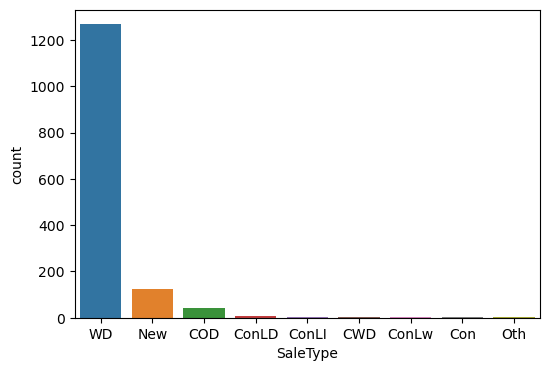

In [68]:
# Look into distribution of Functional feature
rcParams['figure.figsize'] = 6, 4
sns.countplot(x = df_train_cat['SaleType'])

In [69]:
# As Saletype mainly consists of type WD, the missing value can be assumed to be of te same type
df_train_cat.loc[df_train_cat['SaleType'].isnull(), 'SaleType'] = 'WD'
df_test_cat.loc[df_test_cat['SaleType'].isnull(), 'SaleType'] = 'WD'

# Print missing value percentage of Utilities for check
print(f'SaleType: {round(df_test_cat["SaleType"].isnull().sum() * (100 / len(df_test_cat)), 4)}')

SaleType: 0.0


In [70]:
# final check for any missing values in both train and test
print(df_train_cat.isnull().any())
print(df_test_cat.isnull().any())

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
Fence            False
SaleType         False
SaleCondition    False
SalePrice        False
dtype: bool
MSZoning         False
Street           False

### Data Exploration & Cleaning

In [71]:
# Create encoded copy of data to analyse feature variance
from sklearn import preprocessing

# create a deepcopy of the data frame to not modify orginial values
df_train_cat_enc_lbl = df_train_cat.copy(deep=True)

columns_df = df_train_cat_enc_lbl.columns
for i in columns_df[:-1]:
    # use labelEncoder to change cat features into numerical
    le = preprocessing.LabelEncoder()
    df_train_cat_enc_lbl[i] = le.fit_transform(df_train_cat_enc_lbl[i])
    
df_train_cat_enc_lbl.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,3,1,2,5,5,2,4,8,4,208500
2,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,4,8,4,181500
3,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,4,8,4,223500
4,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,2,5,3,5,5,2,4,8,0,140000
5,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,4,8,4,250000


In [72]:
# Survey for quasi-constant/constant features by calculating feature variance
from sklearn.feature_selection import VarianceThreshold

# create a 10% variance threshold, dropping columns of 90% similarity in values
var_tres = VarianceThreshold(threshold = 0.10)

# Apply treshold on dataset, excluding target column salesprice
var_tres.fit(df_train_cat_enc_lbl.iloc[:, :-1])

# Create a list of the quasi-constant/constant features
quasi_constant_features = []

for column in df_train_cat_enc_lbl.iloc[:, :-1].columns:
    if column not in df_train_cat_enc_lbl.iloc[:, :-1].columns[var_tres.get_support()]:
        quasi_constant_features.append(column)

print(quasi_constant_features)

# Drop the quasi-constant/constant features from the train, test and encoded dataset
df_train_cat.drop(quasi_constant_features, axis = 1, inplace=True)
df_test_cat.drop(quasi_constant_features, axis = 1, inplace=True)
df_train_cat_enc_lbl.drop(quasi_constant_features, axis = 1, inplace=True)

df_train_cat.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'Heating', 'CentralAir']


,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,NoFp,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal,208500
2,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NoVnr,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal,181500
3,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal,223500
4,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NoVnr,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NoFence,WD,Abnorml,140000
5,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal,250000


<Axes: >

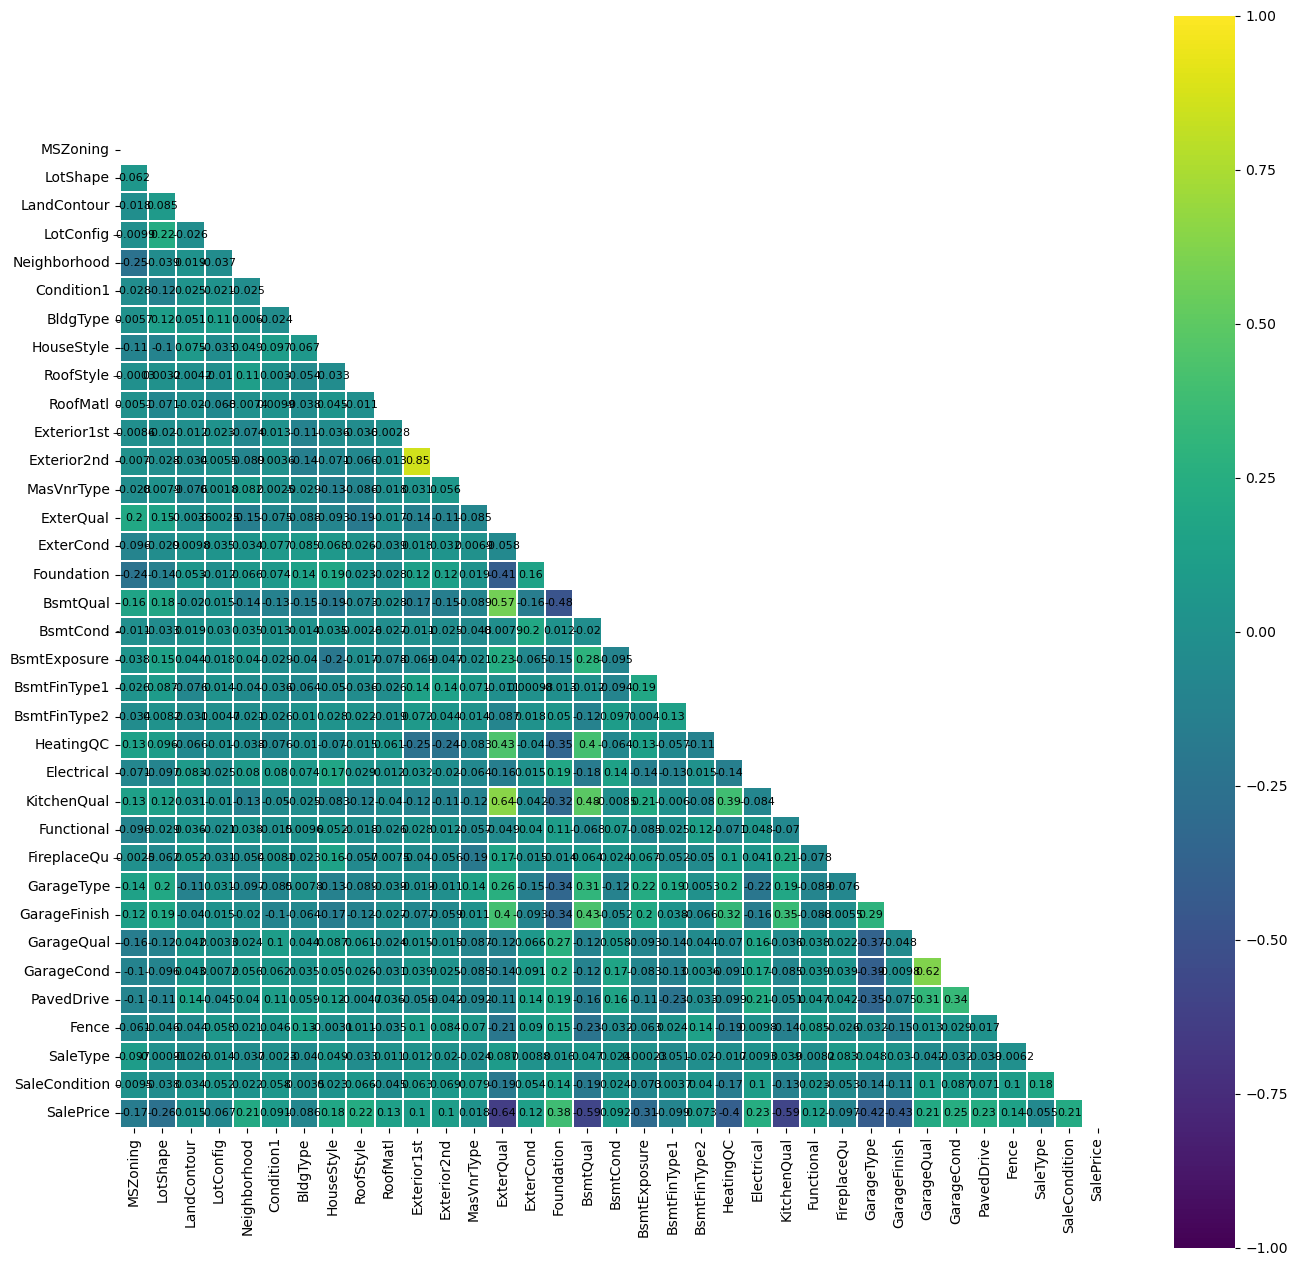

In [73]:
# Create correlation heatmap of the train dataset
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 16, 16

# Define correlation matrix
corr_matrix = df_train_cat_enc_lbl.corr()
corr_matrix

# Create mask to only display the lower part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot the heatmap
sns.heatmap(corr_matrix, mask = mask, vmax = 1.0, vmin = -1.0, linewidths = 0.1, annot_kws = \
            {'size': 8, 'color': 'black'}, square = True, cmap = 'viridis', annot = True)

In [74]:
# Select all features with correlation higher than 0.3 (30%)
# Calculate correlation with SalePrice
df_cat_corr = df_train_cat_enc_lbl.corr()['SalePrice'][:-1]

features_corr_list = df_cat_corr[abs(df_cat_corr) >= 0.3].sort_values(ascending=False)
print(features_corr_list)

Foundation      0.382479
BsmtExposure   -0.309043
HeatingQC      -0.400178
GarageType     -0.415283
GarageFinish   -0.425684
KitchenQual    -0.589189
BsmtQual       -0.593734
ExterQual      -0.636884
Name: SalePrice, dtype: float64


In [75]:
# Create list of correlated features
features_list = features_corr_list.index.tolist()

# Add target variable to list of features
features_list.append('SalePrice')

print(features_list)

['Foundation', 'BsmtExposure', 'HeatingQC', 'GarageType', 'GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual', 'SalePrice']


In [76]:
# Set train and test of numerical values to correlated features
df_train_cat = df_train_cat.loc[:, features_list]
df_test_cat = df_test_cat.loc[:, features_list[:-1]]

In [77]:
df_train_cat.head()

,Foundation,BsmtExposure,HeatingQC,GarageType,GarageFinish,KitchenQual,BsmtQual,ExterQual,SalePrice
Id,,,,,,,,,
1,PConc,No,Ex,Attchd,RFn,Gd,Gd,Gd,208500
2,CBlock,Gd,Ex,Attchd,RFn,TA,Gd,TA,181500
3,PConc,Mn,Ex,Attchd,RFn,Gd,Gd,Gd,223500
4,BrkTil,No,Gd,Detchd,Unf,Gd,TA,TA,140000
5,PConc,Av,Ex,Attchd,RFn,Gd,Gd,Gd,250000


In [78]:
df_test_cat.head()

,Foundation,BsmtExposure,HeatingQC,GarageType,GarageFinish,KitchenQual,BsmtQual,ExterQual
Id,,,,,,,,
1461,CBlock,No,TA,Attchd,Unf,TA,TA,TA
1462,CBlock,No,TA,Attchd,Unf,Gd,TA,TA
1463,PConc,No,Gd,Attchd,Fin,TA,Gd,TA
1464,PConc,No,Ex,Attchd,Fin,Gd,TA,TA
1465,PConc,No,Ex,Attchd,RFn,Gd,Gd,Gd


In [79]:
# delete the encoded data frame as it is no longer needed
del df_train_cat_enc_lbl

In [80]:
df_train_cat.isnull().sum()

Foundation      0
BsmtExposure    0
HeatingQC       0
GarageType      0
GarageFinish    0
KitchenQual     0
BsmtQual        0
ExterQual       0
SalePrice       0
dtype: int64

### Categorical Data Encoding

In [81]:
# Encode the categorical data in binary format (hot encoding)
# Create two new dataframes for results of encoding
df_train_cat_enc_hot = pd.DataFrame()
df_test_cat_enc_hot = pd.DataFrame()

# Loop through all columns of the train data to generate dummies for all these colums
for i in df_train_cat.columns.tolist()[:-1]:
    df_dummies_train = pd.get_dummies(df_train_cat[i], prefix = i)
    df_dummies_test = pd.get_dummies(df_test_cat[i], prefix = i)
        
    df_train_cat_enc_hot = pd.concat([df_train_cat_enc_hot, df_dummies_train], axis = 1)
    df_test_cat_enc_hot = pd.concat([df_test_cat_enc_hot, df_dummies_test], axis = 1)
    
# check the shape of both dataframes
print(df_train_cat_enc_hot.shape)
print(df_test_cat_enc_hot.shape)

(1460, 40)
(1456, 40)


In [82]:
df_train_cat_enc_hot.head()

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False
2,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True
5,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False


In [83]:
df_test_cat_enc_hot.head()

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
1462,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True
1463,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
1464,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
1465,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False


In [84]:
# Set train and test dataframes to their original one
df_train_cat = df_train_cat_enc_hot
df_test_cat = df_test_cat_enc_hot

## Numerical and Categorical Merger

In [85]:
# Concatenate numerical and categorical train and test into a joint train and test dataset
df_train = pd.concat([df_train_num.iloc[:, :-1], df_train_cat], axis = 1)
df_test = pd.concat([df_test_num, df_test_cat], axis = 1)

# Append SalePrice to train dataframe
df_train = pd.concat([df_train, df_train_num['SalePrice']], axis = 1)

# check shape of both dataframes
print(df_train.shape)
print(df_test.shape)

(1460, 59)
(1456, 58)


In [86]:
df_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,65.0,0,854,61,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,208500
2,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,80.0,298,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,181500
3,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,68.0,0,866,42,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,223500
4,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,60.0,0,756,35,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,140000
5,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,84.0,192,1053,84,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,250000


In [87]:
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,5,896,1.0,730.0,882.0,896,1,5,1961,1961,1961.0,0.0,0,468.0,80.0,140,0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
1462,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,1958.0,108.0,0,923.0,81.0,393,0,36,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True
1463,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,1997.0,0.0,1,791.0,74.0,212,701,34,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
1464,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,1998.0,20.0,1,602.0,78.0,360,678,36,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
1465,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,1992.0,0.0,0,263.0,43.0,0,0,82,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False


In [88]:
# check dtypes of dataframes
print(df_train.dtypes)
print(df_test.dtypes)

OverallQual                int64
GrLivArea                  int64
GarageCars                 int64
GarageArea                 int64
TotalBsmtSF                int64
1stFlrSF                   int64
FullBath                   int64
TotRmsAbvGrd               int64
YearBuilt                  int64
YearRemodAdd               int64
GarageYrBlt              float64
MasVnrArea               float64
Fireplaces                 int64
BsmtFinSF1                 int64
LotFrontage              float64
WoodDeckSF                 int64
2ndFlrSF                   int64
OpenPorchSF                int64
Foundation_BrkTil           bool
Foundation_CBlock           bool
Foundation_PConc            bool
Foundation_Slab             bool
Foundation_Stone            bool
Foundation_Wood             bool
BsmtExposure_Av             bool
BsmtExposure_Gd             bool
BsmtExposure_Mn             bool
BsmtExposure_No             bool
BsmtExposure_NoBsmt         bool
HeatingQC_Ex                bool
HeatingQC_

In [89]:
# As the dtypes of the numerical columns are different after concatenation, changing the dtypes to float64
# Change to float64 instead of int64 due to compatibility with more ML algorithms
df_train[df_train_num.columns] = df_train[df_train_num.columns].applymap(np.float64)
df_test[df_test_num.columns] = df_test[df_test_num.columns].applymap(np.float64)

# check dtypes to confirm change
print(df_train.dtypes)
print(df_test.dtypes)

OverallQual              float64
GrLivArea                float64
GarageCars               float64
GarageArea               float64
TotalBsmtSF              float64
1stFlrSF                 float64
FullBath                 float64
TotRmsAbvGrd             float64
YearBuilt                float64
YearRemodAdd             float64
GarageYrBlt              float64
MasVnrArea               float64
Fireplaces               float64
BsmtFinSF1               float64
LotFrontage              float64
WoodDeckSF               float64
2ndFlrSF                 float64
OpenPorchSF              float64
Foundation_BrkTil           bool
Foundation_CBlock           bool
Foundation_PConc            bool
Foundation_Slab             bool
Foundation_Stone            bool
Foundation_Wood             bool
BsmtExposure_Av             bool
BsmtExposure_Gd             bool
BsmtExposure_Mn             bool
BsmtExposure_No             bool
BsmtExposure_NoBsmt         bool
HeatingQC_Ex                bool
HeatingQC_

This concludes the merger of numerical and calculate features into a join train and test set

# Data Preparation for Modelling

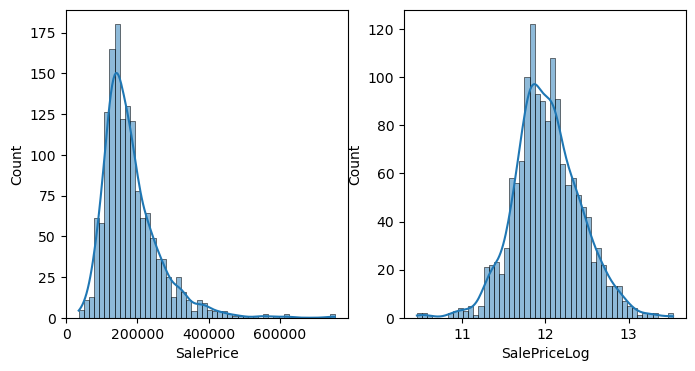

In [90]:
# To have an approximate normal distribution of the independent target value SalePrice, log transformation can be
# performed.
df_train['SalePriceLog'] = np.log(df_train.SalePrice)

# Plot the original and the log distributions
rcParams['figure.figsize'] = 8, 4

fig, axes = plt.subplots(1, 2)
p = sns.histplot(ax=axes[0], x=df_train["SalePrice"],
                 kde=True, bins=50)
q = sns.histplot(ax=axes[1], x=df_train["SalePriceLog"],
                 kde=True, bins=50)

In [91]:
# Create X_train, X_test and y_train, y_test from df_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -1:], \
                                                    test_size = 0.3, shuffle = False)

In [92]:
X_train.dtypes

OverallQual              float64
GrLivArea                float64
GarageCars               float64
GarageArea               float64
TotalBsmtSF              float64
1stFlrSF                 float64
FullBath                 float64
TotRmsAbvGrd             float64
YearBuilt                float64
YearRemodAdd             float64
GarageYrBlt              float64
MasVnrArea               float64
Fireplaces               float64
BsmtFinSF1               float64
LotFrontage              float64
WoodDeckSF               float64
2ndFlrSF                 float64
OpenPorchSF              float64
Foundation_BrkTil           bool
Foundation_CBlock           bool
Foundation_PConc            bool
Foundation_Slab             bool
Foundation_Stone            bool
Foundation_Wood             bool
BsmtExposure_Av             bool
BsmtExposure_Gd             bool
BsmtExposure_Mn             bool
BsmtExposure_No             bool
BsmtExposure_NoBsmt         bool
HeatingQC_Ex                bool
HeatingQC_

# Modelling

In [93]:
import os
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [94]:
# Define lists for model evaluation
list_model = []
list_r2 = []
list_rmse = []

## Lasso/Ridge/ElasticNet Regression

### Defining Lasso/Ridge/ElasticNet search parameters

In [95]:
reg_grid_param = {'alpha': np.logspace(-5, 2, 200).tolist()} 

### Lasso Regression

In [96]:
# supress ConvergenceWarning that happens due to GridSearch
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning'

# define and fit GridSearch
lasso_cv = GridSearchCV(Lasso(), reg_grid_param, cv = 10, n_jobs = -1, verbose = 1)
lasso_cv.fit(X_train, y_train)

print(f'Best hyperparameters: {lasso_cv.best_params_}')
print(f'Best R2: {lasso_cv.best_score_}')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best hyperparameters: {'alpha': 0.0004880251583654434}
Best R2: 0.8573435271203692


In [97]:
# define and fit Lasso on best parameters from GridSearch
lasso_reg = Lasso(alpha=lasso_cv.best_params_['alpha'])
lasso_reg.fit(X_train, y_train)

# predict y on the test set
y_pred = lasso_reg.predict(X_test)

print(f'{lasso_reg.__class__.__name__}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
list_model.append(lasso_reg.__class__.__name__)
list_r2.append(r2_score(y_test, y_pred))
list_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Lasso
R2: 0.7575121421486382
RMSE: 0.18987533448908236


### Ridge Regression

In [98]:
# supress ConvergenceWarning that happens due to GridSearch
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning'

# define and fit GridSearch
ridge_cv = GridSearchCV(Ridge(), reg_grid_param, cv = 10, n_jobs = -1, verbose = 1)
ridge_cv.fit(X_train, y_train)

print(f'Best hyperparameters: {ridge_cv.best_params_}')
print(f'Best R2: {ridge_cv.best_score_}')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best hyperparameters: {'alpha': 21.461411978584056}
Best R2: 0.8577303387563389


In [99]:
# define and fit Lasso on best parameters from GridSearch
ridge_reg = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_reg.fit(X_train, y_train)

# predict y on the test set
y_pred = ridge_reg.predict(X_test)

print(f'{ridge_reg.__class__.__name__}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
list_model.append(ridge_reg.__class__.__name__)
list_r2.append(r2_score(y_test, y_pred))
list_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge
R2: 0.7582132840771758
RMSE: 0.18960062809102135


### ElasticNet Regression

In [100]:
reg_grid_param['l1_ratio'] = np.round(np.linspace(0.05, 0.95, 7), 2).tolist()

In [101]:
# supress ConvergenceWarning that happens due to GridSearch
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning'

# define and fit GridSearch
elastic_net_cv = GridSearchCV(ElasticNet(), reg_grid_param, cv = 10, n_jobs = -1, verbose = 1)
elastic_net_cv.fit(X_train, y_train)

print(f'Best hyperparameters: {elastic_net_cv.best_params_}')
print(f'Best R2: {elastic_net_cv.best_score_}')

Fitting 10 folds for each of 1400 candidates, totalling 14000 fits
Best hyperparameters: {'alpha': 0.0005291978735958442, 'l1_ratio': 0.95}
Best R2: 0.8573432438895724


In [102]:
# define and fit Elastic Net on best parameters from GridSearch
elastic_net_reg = ElasticNet(alpha=elastic_net_cv.best_params_['alpha'])
elastic_net_reg.fit(X_train, y_train)

# predict y on the test set
y_pred = elastic_net_reg.predict(X_test)

print(f'{elastic_net_reg.__class__.__name__}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
list_model.append(elastic_net_reg.__class__.__name__)
list_r2.append(r2_score(y_test, y_pred))
list_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

ElasticNet
R2: 0.7601307492511767
RMSE: 0.18884732729131717


/opt/homebrew/Caskroom/miniforge/base/envs/eda_ml/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.117e-02, tolerance: 1.677e-02
  model = cd_fast.enet_coordinate_descent(


## XGBoost/LightGBM Regression

In [103]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### XGBoost Regression

In [104]:
# supress ConvergenceWarning that happens due to GridSearch
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning'

# create parameter dictionary
xgboost_grid_param = {'max_depth': np.rint(np.linspace(3, 10, 4)).astype(int).tolist(), 
                      'colsample_bytree': np.round(np.linspace(0, 1, 9), 3).tolist(), 
                      'learning_rate': np.round(np.linspace(0.01, 0.1, 10), 2).tolist(), 
                      'n_estimators': np.rint(np.linspace(100, 500, 3)).astype(int).tolist()}

# define and fit GridSearch
xgboost_cv = GridSearchCV(XGBRegressor(), param_grid = xgboost_grid_param, cv = 10, n_jobs = -1, verbose = 1)
xgboost_cv.fit(X_train, y_train)

print(f'Best hyperparameters: {xgboost_cv.best_params_}')
print(f'Best R2: {xgboost_cv.best_score_}')

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Best hyperparameters: {'colsample_bytree': 0.25, 'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 500}
Best R2: 0.870071840444251


In [105]:
# define and fit XGBoost Regressor on best parameters from GridSearch
xgboost_reg = XGBRegressor(seed = 42, 
                           colsample_bytree = xgboost_cv.best_params_['colsample_bytree'], 
                           learning_rate = xgboost_cv.best_params_['learning_rate'], 
                           max_depth = xgboost_cv.best_params_['max_depth'], 
                           n_estimators = xgboost_cv.best_params_['n_estimators'])
xgboost_reg.fit(X_train, y_train)

# predict y on the test set
y_pred = xgboost_reg.predict(X_test)

print(f'{xgboost_reg.__class__.__name__}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
list_model.append(xgboost_reg.__class__.__name__)
list_r2.append(r2_score(y_test, y_pred))
list_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

XGBRegressor
R2: 0.8752353039314947
RMSE: 0.13619758595098255


### LightGBM Regressor

In [106]:
# supress ConvergenceWarning that happens due to GridSearch
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning'

# create parameter dictionary
lightgbm_grid_param = {'max_depth': np.rint(np.linspace(3, 10, 8)).astype(int).tolist(), 
                      'learning_rate': np.round(np.linspace(0.01, 0.1, 10), 2).tolist(), 
                      'n_estimators': np.rint(np.linspace(100, 500, 5)).astype(int).tolist()}

# define and fit GridSearch
lightgbm_cv = GridSearchCV(LGBMRegressor(), param_grid = lightgbm_grid_param, cv = 10, n_jobs = -1, verbose = 1)
lightgbm_cv.fit(X_train, y_train)

print(f'Best hyperparameters: {lightgbm_cv.best_params_}')
print(f'Best R2: {lightgbm_cv.best_score_}')

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best hyperparameters: {'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 100}
Best R2: 0.8603327069827926


In [107]:
# define and fit XGBoost Regressor on best parameters from GridSearch
lightgbm_reg = LGBMRegressor(random_state = 42, 
                           learning_rate = lightgbm_cv.best_params_['learning_rate'], 
                           max_depth = lightgbm_cv.best_params_['max_depth'], 
                           n_estimators = lightgbm_cv.best_params_['n_estimators'])
lightgbm_reg.fit(X_train, y_train)

# predict y on the test set
y_pred = lightgbm_reg.predict(X_test)

print(f'{lightgbm_reg.__class__.__name__}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
list_model.append(lightgbm_reg.__class__.__name__)
list_r2.append(r2_score(y_test, y_pred))
list_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

LGBMRegressor
R2: 0.8497028278856505
RMSE: 0.14948546203043225


## Model Comparison

In [108]:
results = pd.DataFrame({'Model': list_model, 'R2 Score': list_r2, 'RMSE': list_rmse})
results

,Model,R2 Score,RMSE
0,Lasso,0.757512,0.189875
1,Ridge,0.758213,0.189601
2,ElasticNet,0.760131,0.188847
3,XGBRegressor,0.875235,0.136198
4,LGBMRegressor,0.849703,0.149485


## Target Data Prediction

In [109]:
# make the final predictions on the test data / target data
predictions = xgboost_reg.predict(df_test)

# change prediction from logarithmic to original scale
predictions = np.exp(predictions)

# DataFrame of test ID and their corresponding predictions
output = pd.DataFrame({'Id': df_test.index.tolist(), 'SalePrice': predictions})
output.head(10)

,Id,SalePrice
0,1461,123351.890625
1,1462,149943.312500
2,1463,185934.750000
3,1464,193415.671875
4,1465,194113.437500
5,1466,182454.984375
6,1467,179924.765625
7,1468,165004.515625
8,1469,193200.171875
9,1470,122493.195312
